In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')
print(len(df))
df.head()

891


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.Age.mean()

29.69911764705882

In [13]:
sample = df.sample(n=50, random_state=22) #Take a sample of 50 people
sample.Age.mean() #Calculate the sample mean

27.79268292682927

In [4]:
err = np.abs(sample.Age.mean() - df.Age.mean())
per_err = err / df.Age.mean()
print(per_err)

0.06419162827951391


As it stands, our estimate is close but about 6% off of the actual figure. We might start to wonder whether this is a *normal* or expected error for our sample to be off. Can we say that a sample of 50 from a population of roughly 900 will always produce a point estimate this accurate? To simulate this, let's repeat this process of taking a sample (let's stick with 50 people for now) and save all of these sample means and see what happens.

In [5]:
sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i) #Take a sample of 50 people
    sample_means.append(sample.Age.mean()) #Calculate the sample mean

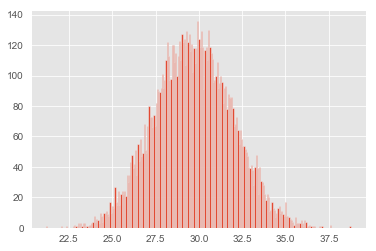

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
#sns.set_style('darkgrid') #Pretty background including grid lines for our backdrop
plt.hist(sample_means, bins=250);

In [9]:
import numpy as np
np.mean(sample_means)

29.678139189972246

In [10]:
population_mean = df.Age.mean()
mean_sample_means = np.mean(sample_means)
acc = 1 - (np.abs(mean_sample_means - population_mean) / population_mean)
print(acc)

0.9992936336582157


In [19]:
from scipy.stats import norm
import math

norm.cdf(-0.66)

0.25462691467133614